In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
import pandas as pd
from spacy import displacy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 88.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


In [ ]:
df = pd.read_csv("train.csv", names=["label","title","description"])
df['text'] = df['title'] + " " + df['description']
df = df.sample(10, random_state=42)
df.head()


,label,title,description,text
71788,3,"BBC set for major shake-up, claims newspaper","London - The British Broadcasting Corporation,...","BBC set for major shake-up, claims newspaper L..."
67218,4,Taking Microsoft for a spin?,The software juggernaut that conquered the des...,Taking Microsoft for a spin? The software jugg...
54066,3,September sales at Target stores beat retail a...,MINNEAPOLIS - While other retailers struggled ...,September sales at Target stores beat retail a...
7168,4,Macromedia launches Flex Builder,"Macromedia this week will ship Flex Builder, w...",Macromedia launches Flex Builder Macromedia th...
29618,1,Rocket lands near Afghan school as President K...,AFP - A rocket landed near a school in southea...,Rocket lands near Afghan school as President K...


In [ ]:
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['entities'] = df['text'].apply(extract_entities)
df[['text','entities']].head()


,text,entities
71788,"BBC set for major shake-up, claims newspaper L...","[(BBC, ORG), (London, GPE), (The British Broad..."
67218,Taking Microsoft for a spin? The software jugg...,"[(Microsoft, ORG), (Windows, NORP)]"
54066,September sales at Target stores beat retail a...,"[(September, DATE), (Target, ORG), (MINNEAPOLI..."
7168,Macromedia launches Flex Builder Macromedia th...,"[(Macromedia, ORG), (Flex Builder Macromedia, ..."
29618,Rocket lands near Afghan school as President K...,"[(Afghan, NORP), (Karzai, PERSON), (Afghanista..."


In [ ]:
sample_text = df['text'].iloc[0]
doc = nlp(sample_text)
displacy.render(doc, style="ent", jupyter=True)


<Axes: title={'center': 'Entity Type Distribution'}>

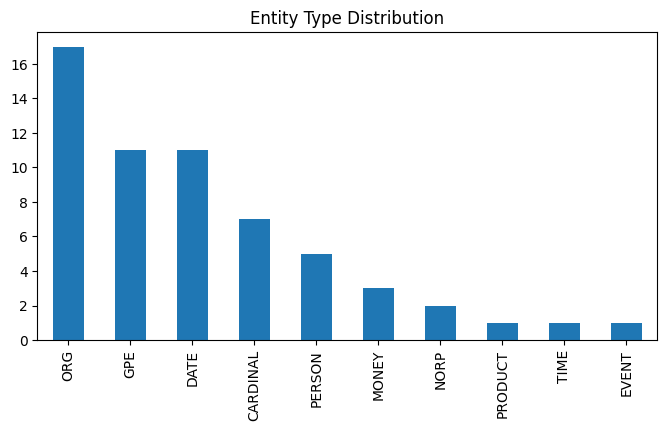

In [ ]:
all_entities = []
for text in df['text']:
    doc = nlp(text)
    for ent in doc.ents:
        all_entities.append(ent.label_)

pd.Series(all_entities).value_counts().plot(kind="bar", figsize=(8,4), title="Entity Type Distribution")


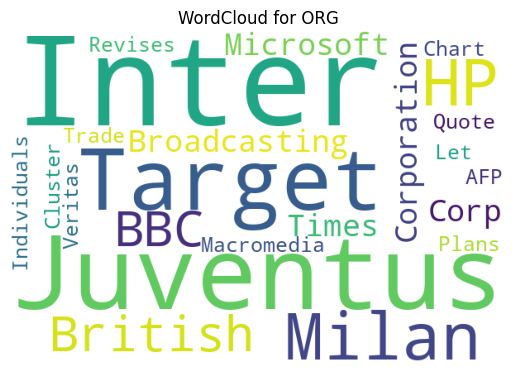

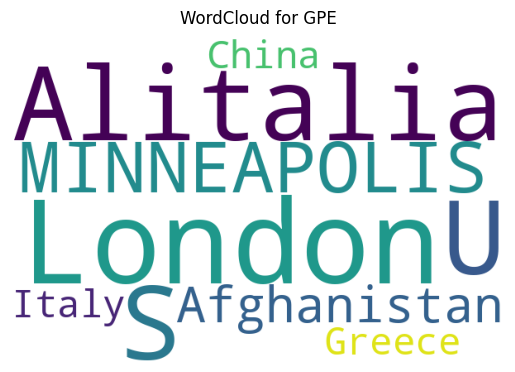

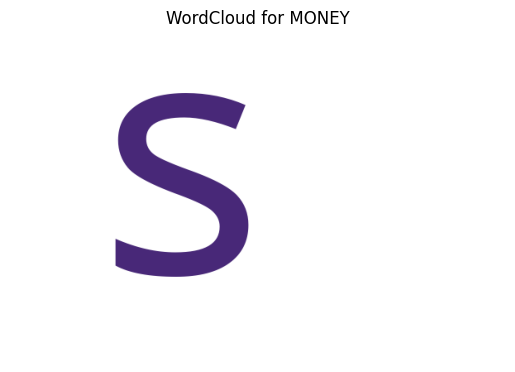

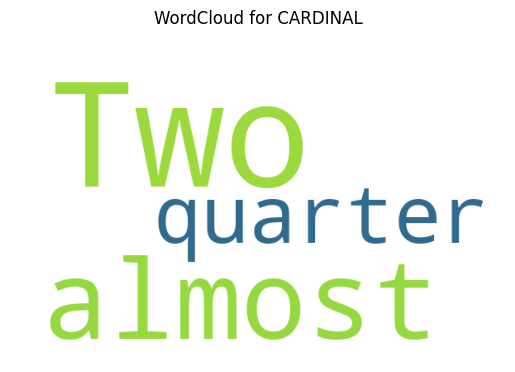

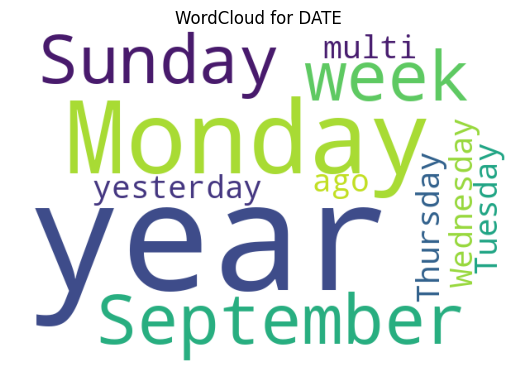

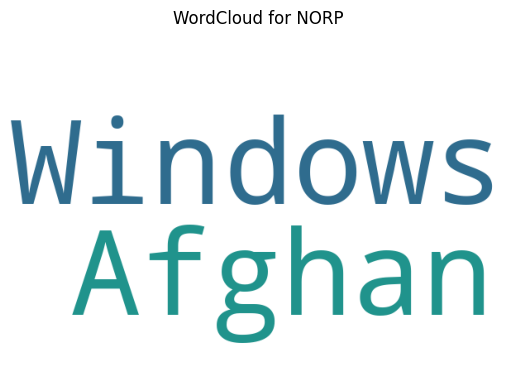

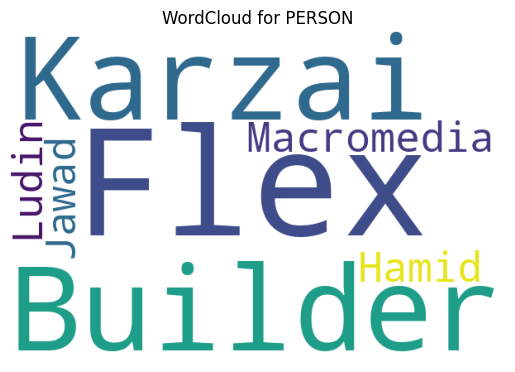

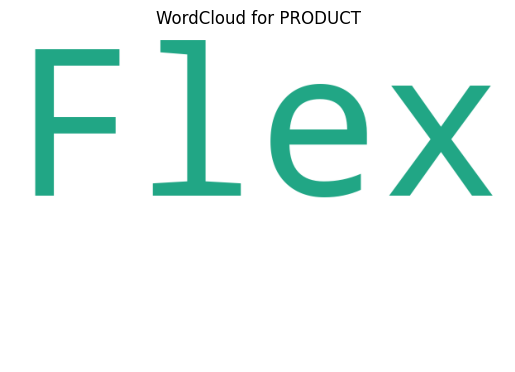

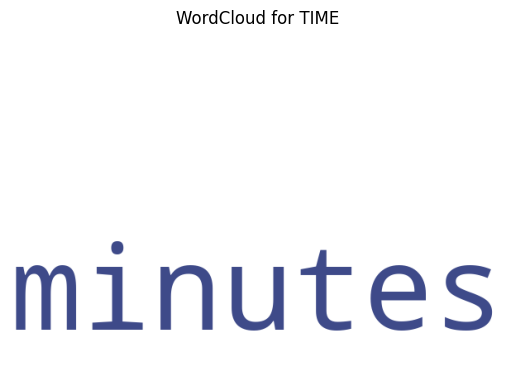

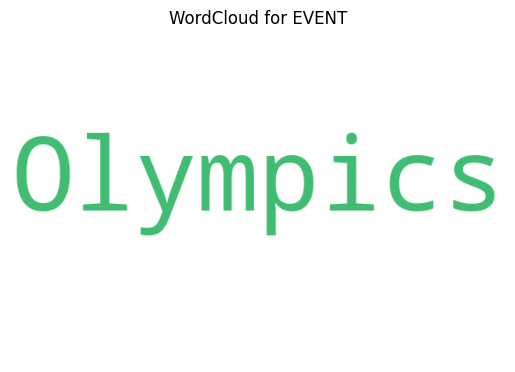

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Collect entities by type
entities_by_type = {}
for text in df['text']:
    doc = nlp(text)
    for ent in doc.ents:
        entities_by_type.setdefault(ent.label_, []).append(ent.text)

# Generate WordCloud for each entity type
for ent_type, ent_list in entities_by_type.items():
    text_blob = " ".join(ent_list)
    wc = WordCloud(width=600, height=400, background_color="white").generate(text_blob)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud for {ent_type}")
    plt.show()
